In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:

stars_df = pd.read_csv('D:/Desktop/Вся прога на питоне/Python DZ/stars.csv')
stars_df['Star color'] = stars_df['Star color'].replace({
    'Blue white': 'Blue-white', 
    'Blue White': 'Blue-white',
    'Blue-white': 'Blue-white'
})

star_types = {
    0: 'Red Dwarf', 
    1: 'Brown Dwarf', 
    2: 'White Dwarf', 
    3: 'Main Sequence', 
    4: 'Super Giants', 
    5: 'Hyper Giants'
}
stars_df['Star type name'] = stars_df['Star type'].map(star_types)
spectral_class_map = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
stars_df['Spectral class number'] = stars_df['Spectral Class'].map(spectral_class_map)
color_counts = stars_df['Star color'].value_counts()
type_counts = stars_df['Star type name'].value_counts()
spectral_class_counts = stars_df['Spectral class number'].value_counts()
print(type_counts)
print(spectral_class_counts)

Star type name
Red Dwarf        40
Brown Dwarf      40
White Dwarf      40
Main Sequence    40
Super Giants     40
Hyper Giants     40
Name: count, dtype: int64
Spectral class number
6    111
1     46
0     40
2     19
3     17
5      6
4      1
Name: count, dtype: int64


In [16]:
type_groups = stars_df.groupby('Star type')['Absolute magnitude(Mv)']
type_stats = type_groups.agg(['min', 'mean', 'max']).reset_index()
print("Минимальные, средние и максимальные значения абсолютной звездной величины по типам звезд:")
print(type_stats)


Минимальные, средние и максимальные значения абсолютной звездной величины по типам звезд:
   Star type    min       mean     max
0          0  16.05  17.563500  20.060
1          1  10.12  12.539975  14.940
2          2  10.18  12.582500  14.870
3          3  -4.70  -0.367425   6.506
4          4  -7.45  -6.369925  -5.240
5          5 -11.92  -9.654250  -7.580


In [17]:
class_groups = stars_df.groupby('Spectral Class')['Temperature (K)']
class_stats = class_groups.agg(['min', 'mean', 'max']).reset_index()
print("\nМинимальные, средние и максимальные значения температуры по спектральным классам:")
print(class_stats)


Минимальные, средние и максимальные значения температуры по спектральным классам:
  Spectral Class   min          mean    max
0              A  7723   9842.368421  14060
1              B  9700  19574.478261  33750
2              F  5300   8516.823529  14732
3              G  6850   6850.000000   6850
4              K  4015   4499.500000   5112
5              M  1939   3257.333333   3834
6              O  5752  22294.075000  40000


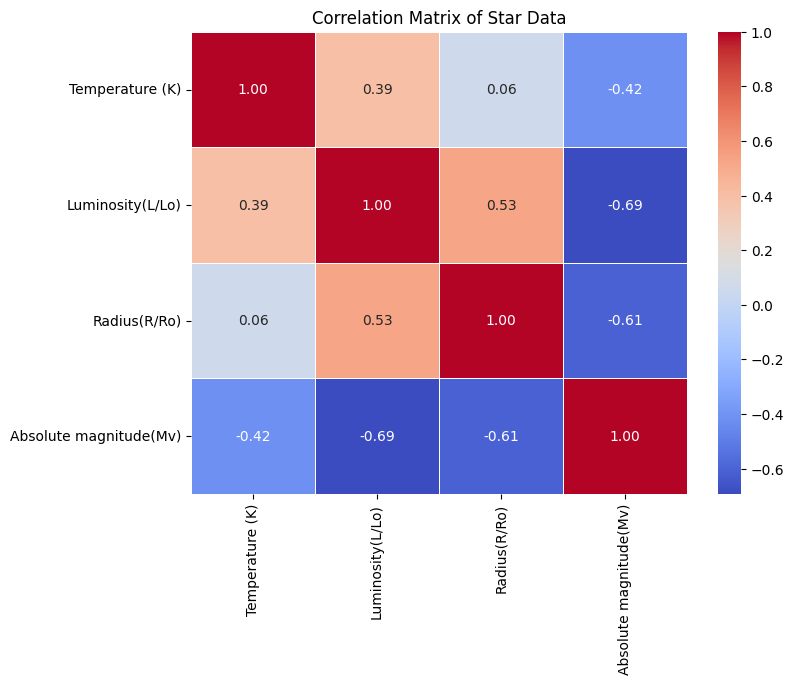

In [5]:
numeric_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
correlation_matrix = stars_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Star Data')
plt.show()

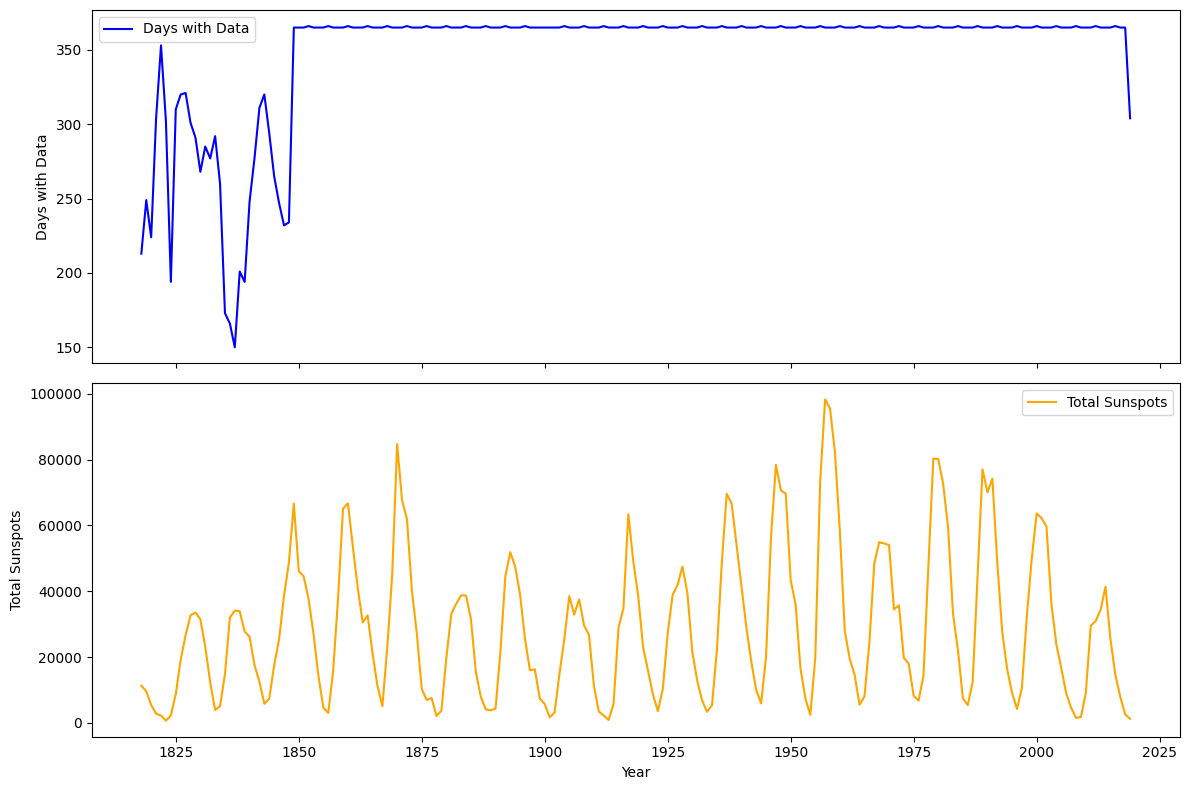

In [18]:
file_path = 'sunspot.csv'  
column_names = ['Year', 'Month', 'Day', 'Number of Sunspots', 'Standard Deviation', 'Observations']
data = pd.read_csv(file_path, sep=';', names=column_names, header=0)
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.replace(-1, np.nan, inplace=True)
data['Has Data'] = data['Number of Sunspots'].notna()
annual_data = data.groupby('Year').agg({
    'Has Data': 'sum',
    'Number of Sunspots': 'sum'
}).rename(columns={'Has Data': 'Days with Data', 'Number of Sunspots': 'Total Sunspots'})
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axes[0].plot(annual_data.index, annual_data['Days with Data'], label='Days with Data', color='blue')
axes[0].set_ylabel('Days with Data')
axes[0].legend()
axes[1].plot(annual_data.index, annual_data['Total Sunspots'], label='Total Sunspots', color='orange')
axes[1].set_ylabel('Total Sunspots')
axes[1].set_xlabel('Year')
axes[1].legend()
plt.tight_layout()
plt.show()

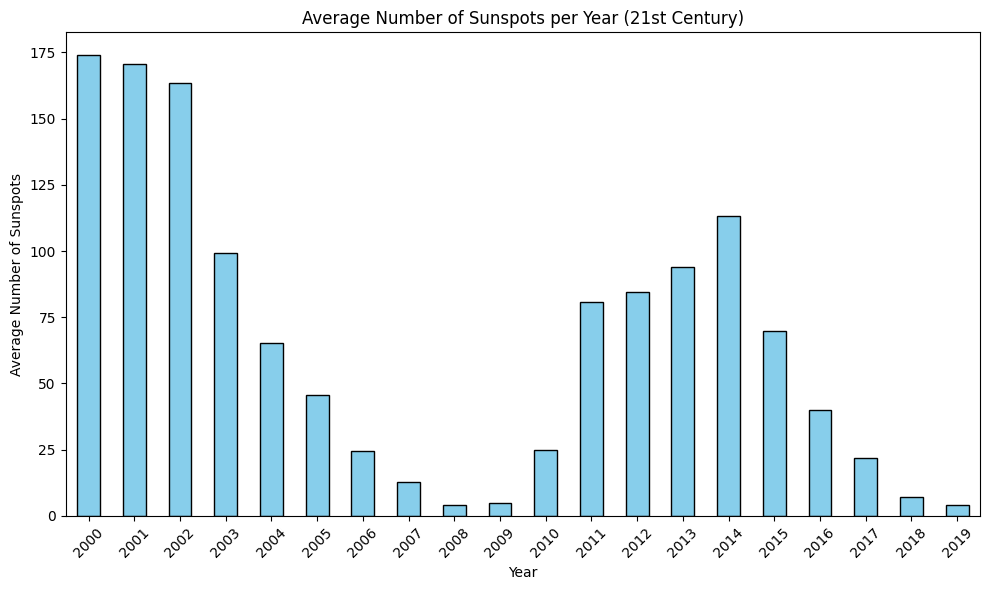

In [8]:
century21_data = data[data['Year'] >= 2000]
yearly_avg = century21_data.groupby('Year')['Number of Sunspots'].mean()
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Number of Sunspots per Year (21st Century)')
plt.xlabel('Year')
plt.ylabel('Average Number of Sunspots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
file_path = 'NBA.csv' 
column_names = ['Player Full Name', 'Birth Date', 'Year Start', 'Year End', 'Position', 'Height', 'Wingspan', 'Weight']
data = pd.read_csv(file_path, names=column_names, header=0)
data['Weight (kg)'] = data['Weight'] * 0.45359237
max_height_player = data.loc[data['Height'].idxmax()]
min_height_player = data.loc[data['Height'].idxmin()]
max_weight_player = data.loc[data['Weight (kg)'].idxmax()]
min_weight_player = data.loc[data['Weight (kg)'].idxmin()]
max_wingspan_player = data.loc[data['Wingspan'].idxmax()]
min_wingspan_player = data.loc[data['Wingspan'].idxmin()]
correlations = data[['Height', 'Wingspan', 'Weight (kg)']].corr()
data['Career Length'] = data['Year End'] - data['Year Start']
data['BMI'] = data['Weight (kg)'] / (data['Height'] / 100) ** 2

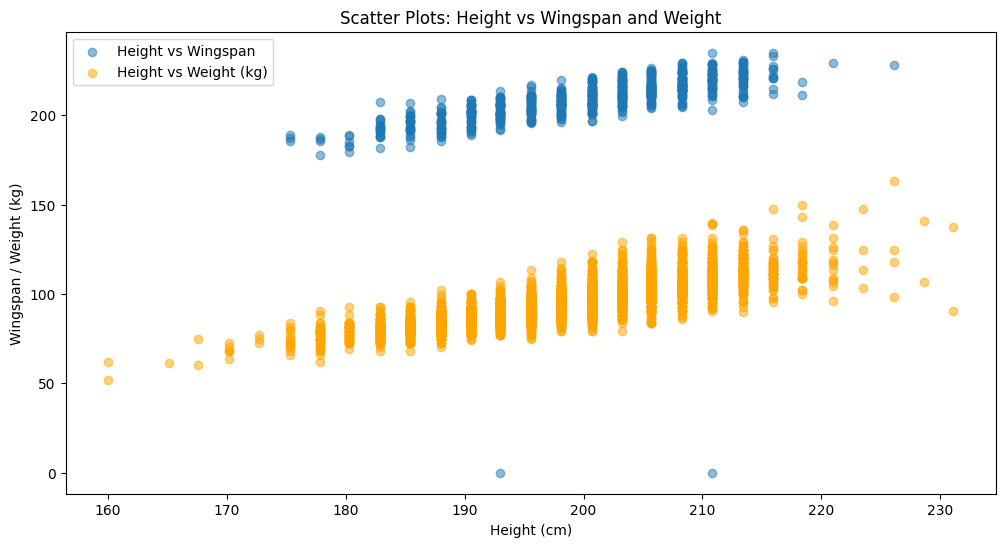

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Height'], data['Wingspan'], alpha=0.5, label='Height vs Wingspan')
plt.scatter(data['Height'], data['Weight (kg)'], alpha=0.5, label='Height vs Weight (kg)', color='orange')
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Wingspan / Weight (kg)')
plt.title('Scatter Plots: Height vs Wingspan and Weight')
plt.show()

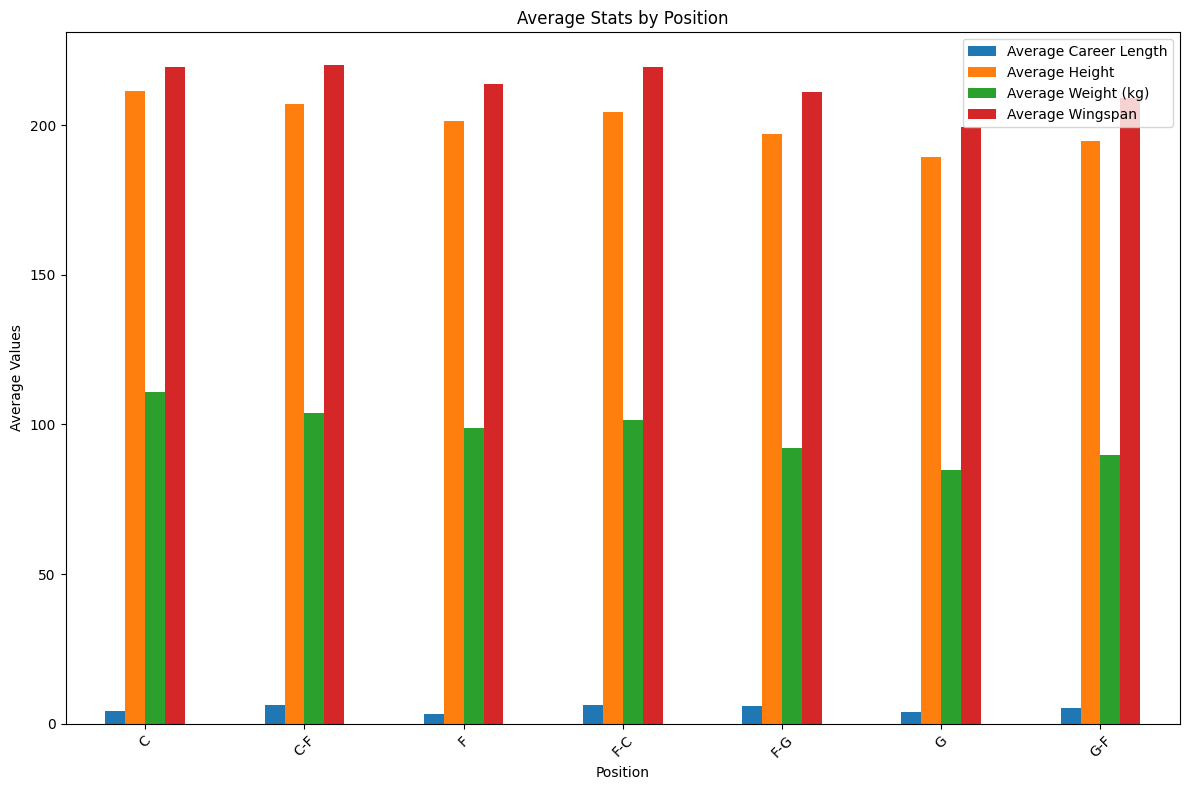

In [21]:
position_stats = data.groupby('Position').agg({
    'Career Length': 'mean',
    'Height': 'mean',
    'Weight (kg)': 'mean',
    'Wingspan': lambda x: x.dropna().mean()
}).rename(columns={
    'Career Length': 'Average Career Length',
    'Height': 'Average Height',
    'Weight (kg)': 'Average Weight (kg)',
    'Wingspan': 'Average Wingspan'
})
position_stats.plot(kind='bar', figsize=(12, 8))
plt.title('Average Stats by Position')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

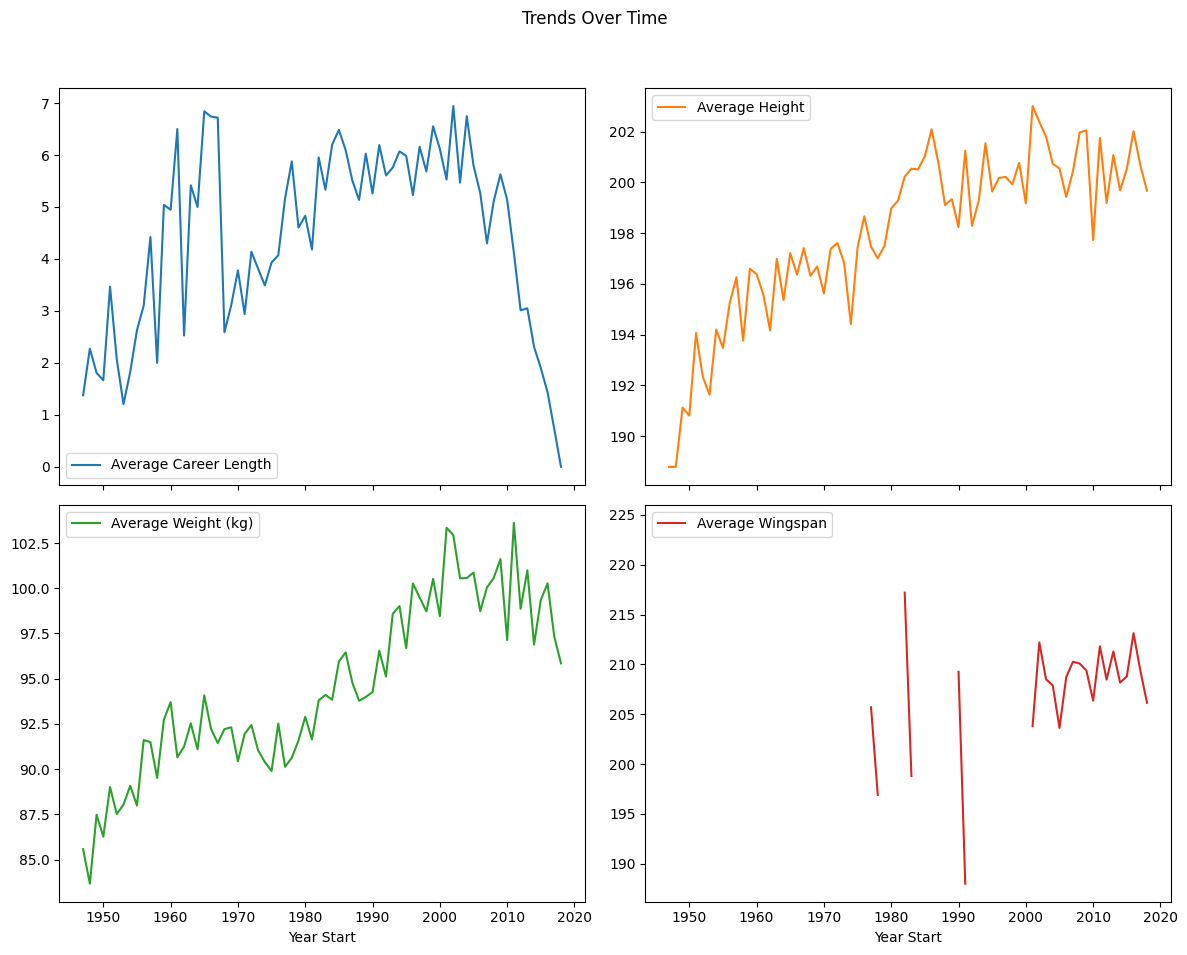

In [13]:
yearly_stats = data.groupby('Year Start').agg({
    'Career Length': 'mean',
    'Height': 'mean',
    'Weight (kg)': 'mean',
    'Wingspan': lambda x: x.dropna().mean()
}).rename(columns={
    'Career Length': 'Average Career Length',
    'Height': 'Average Height',
    'Weight (kg)': 'Average Weight (kg)',
    'Wingspan': 'Average Wingspan'
})
yearly_stats.plot(subplots=True, figsize=(12, 10), layout=(2, 2))
plt.suptitle('Trends Over Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()